<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Lecture-11_February-26-2026/Lecture-11_Classification-3_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lecture 11 - Classification



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here we create an example dataset for classifcation with 4 classes.

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

n_classes=4
n_samples=1000

uneven_classes = False

if uneven_classes:
  weights=[4, 1, 0.4, 0.1]
  weights/=np.sum(weights)
else:
  weights=None

features, target = make_classification(
    n_samples=n_samples,
    n_features=12,
    n_informative=4,
    n_redundant=1,
    n_repeated=0,
    n_classes=n_classes,
    shuffle=True,
    weights=weights
)

feature_names = [f"feature {i}" for i in range(features.shape[1])]

print("Size of each class")
for i in range(n_classes):
  num = np.sum(target == i)
  perc = num/n_samples
  print("- {:d}: {:d} ({:.1f}%)".format(i,num,perc*100))

Size of each class
- 0: 250 (25.0%)
- 1: 251 (25.1%)
- 2: 248 (24.8%)
- 3: 251 (25.1%)


In [ ]:
print(target.shape)

### Classifcation using RandomForrest

Accuracy:                 0.6750
Precision (micro):        0.6750
Precision (macro):        0.6805
Recall (micro):           0.6750
Recall (macro):           0.6789


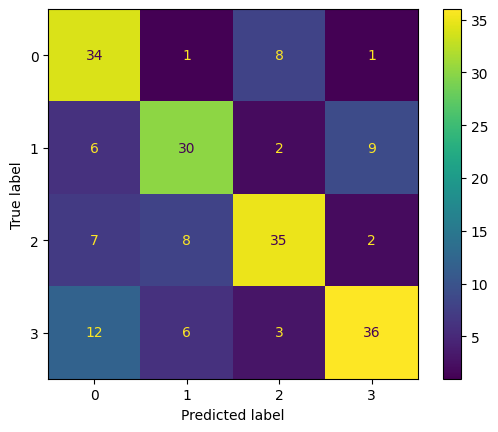

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(max_depth=2)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

model.fit(features_train, target_train)

target_test_predicted = model.predict(features_test)

print("Accuracy:                 {:.4f}".format(metrics.accuracy_score(target_test,target_test_predicted)))
print("Precision (micro):        {:.4f}".format(metrics.precision_score(target_test,target_test_predicted,average='micro')))
print("Precision (macro):        {:.4f}".format(metrics.precision_score(target_test,target_test_predicted,average='macro')))
print("Recall (micro):           {:.4f}".format(metrics.recall_score(target_test,target_test_predicted,average='micro')))
print("Recall (macro):           {:.4f}".format(metrics.recall_score(target_test,target_test_predicted,average='macro')))

cfm = metrics.ConfusionMatrixDisplay.from_predictions(target_test,target_test_predicted)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit

scoring = {'accuracy':'accuracy',
            'recall_micro': metrics.make_scorer(metrics.recall_score, zero_division=np.nan, average='micro'),
            'precision_micro': metrics.make_scorer(metrics.precision_score, zero_division=np.nan,average='micro'),
            'recall_macro': metrics.make_scorer(metrics.recall_score, zero_division=np.nan, average='macro'),
            'precision_macro': metrics.make_scorer(metrics.precision_score, zero_division=np.nan,average='macro'),
            'roc_auc_ovr': 'roc_auc_ovr',
            'roc_auc_ovo': 'roc_auc_ovo'
}



NumSplits=100
cv_random = ShuffleSplit(n_splits=NumSplits, test_size=0.2)


model = RandomForestClassifier(n_estimators=100)

# Evaluate the models using crossvalidation
scores_random = cross_validate(
        model,
        features, target,
        scoring=scoring,
        cv=cv_random,
        return_train_score=True,
        return_estimator=True,
        return_indices=True
)

print("- Accuracy:               {:.3f} +- {:.3f}".format(scores_random['test_accuracy'].mean(), scores_random['test_accuracy'].std()))
print("- ROC AUC (OVR, Macro):   {:.3f} +- {:.3f}".format(scores_random['test_roc_auc_ovr'].mean(), scores_random['test_roc_auc_ovr'].std()))
print("- ROC AUC (OVO, Macro):   {:.3f} +- {:.3f}".format(scores_random['test_roc_auc_ovo'].mean(), scores_random['test_roc_auc_ovo'].std()))
print("- Precision (Micro):      {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_precision_micro']), np.nanstd(scores_random['test_precision_micro'])))
print("- Precision (Macro):      {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_precision_macro']), np.nanstd(scores_random['test_precision_macro'])))
print("- Recall (Micro):         {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_precision_micro']), np.nanstd(scores_random['test_precision_micro'])))
print("- Recall (Macro):         {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_precision_macro']), np.nanstd(scores_random['test_precision_macro'])))
print(" ")


- Accuracy:               0.767 +- 0.025
- ROC AUC (OVR, Macro):   0.936 +- 0.011
- ROC AUC (OVO, Macro):   0.936 +- 0.011
- Precision (Micro):      0.767 +- 0.025
- Precision (Macro):      0.768 +- 0.024
- Recall (Micro):         0.767 +- 0.025
- Recall (Macro):         0.768 +- 0.024
 


### Classifcation using RandomForrest - Uneven Dataset

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

n_classes=4
n_samples=1000

uneven_classes = True

if uneven_classes:
  weights=[4, 1, 1, 2]
  weights/=np.sum(weights)
else:
  weights=None

features, target = make_classification(
    n_samples=n_samples,
    n_features=12,
    n_informative=4,
    n_redundant=1,
    n_repeated=0,
    n_classes=n_classes,
    shuffle=True,
    weights=weights
)

feature_names = [f"feature {i}" for i in range(features.shape[1])]

print("Size of each class")
for i in range(n_classes):
  num = np.sum(target == i)
  perc = num/n_samples
  print("- {:d}: {:d} ({:.1f}%)".format(i,num,perc*100))

Size of each class
- 0: 497 (49.7%)
- 1: 127 (12.7%)
- 2: 124 (12.4%)
- 3: 252 (25.2%)


Accuracy:                 0.5600
Precision (micro):        0.5600
Precision (macro):        0.3440
Recall (micro):           0.5600
Recall (macro):           0.3141


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


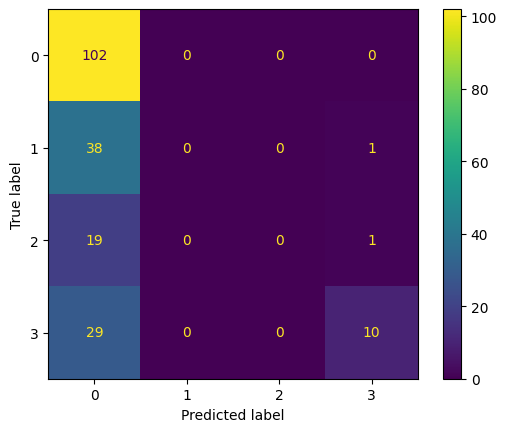

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(max_depth=2)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

model.fit(features_train, target_train)

target_test_predicted = model.predict(features_test)

print("Accuracy:                 {:.4f}".format(metrics.accuracy_score(target_test,target_test_predicted)))
print("Precision (micro):        {:.4f}".format(metrics.precision_score(target_test,target_test_predicted,average='micro')))
print("Precision (macro):        {:.4f}".format(metrics.precision_score(target_test,target_test_predicted,average='macro')))
print("Recall (micro):           {:.4f}".format(metrics.recall_score(target_test,target_test_predicted,average='micro')))
print("Recall (macro):           {:.4f}".format(metrics.recall_score(target_test,target_test_predicted,average='macro')))

cfm = metrics.ConfusionMatrixDisplay.from_predictions(target_test,target_test_predicted)


### Y-scrambling / Y-randomization

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

n_classes=4
n_samples=1000

uneven_classes = False

if uneven_classes:
  weights=[4, 1, 0.4, 0.1]
  weights/=np.sum(weights)
else:
  weights=None

features, target = make_classification(
    n_samples=n_samples,
    n_features=12,
    n_informative=4,
    n_redundant=1,
    n_repeated=0,
    n_classes=n_classes,
    shuffle=True,
    weights=weights
)

feature_names = [f"feature {i}" for i in range(features.shape[1])]

print("Size of each class")
for i in range(n_classes):
  num = np.sum(target == i)
  perc = num/n_samples
  print("- {:d}: {:d} ({:.1f}%)".format(i,num,perc*100))

Size of each class
- 0: 251 (25.1%)
- 1: 246 (24.6%)
- 2: 249 (24.9%)
- 3: 254 (25.4%)


Accuracy:                 0.7050
Precision (micro):        0.7050
Precision (macro):        0.7125
Recall (micro):           0.7050
Recall (macro):           0.7089


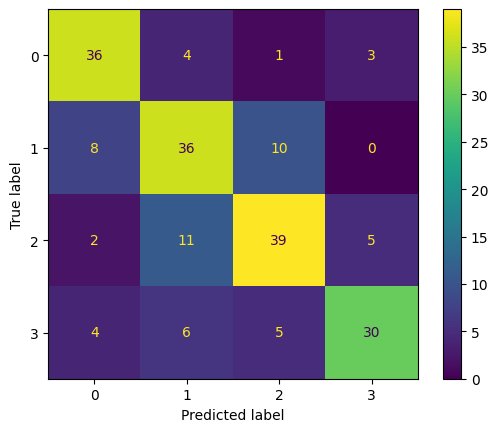

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier()

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

scramble = False

# this works for numpy arrays
rng = np.random.default_rng()
target_train_used = rng.choice(target_train, size=target_train.size, replace=False) if scramble else target_train.copy()

# if you are using a panda dataframe you should use something like
# target_train_used = target_train.sample(frac=1.0).reset_index(drop=True) if scramble else target_train.copy()

model.fit(features_train, target_train_used)

target_test_predicted = model.predict(features_test)

print("Accuracy:                 {:.4f}".format(metrics.accuracy_score(target_test,target_test_predicted)))
print("Precision (micro):        {:.4f}".format(metrics.precision_score(target_test,target_test_predicted,average='micro')))
print("Precision (macro):        {:.4f}".format(metrics.precision_score(target_test,target_test_predicted,average='macro')))
print("Recall (micro):           {:.4f}".format(metrics.recall_score(target_test,target_test_predicted,average='micro')))
print("Recall (macro):           {:.4f}".format(metrics.recall_score(target_test,target_test_predicted,average='macro')))

cfm = metrics.ConfusionMatrixDisplay.from_predictions(target_test,target_test_predicted)


Accuracy:                 0.2200
Precision (micro):        0.2200
Precision (macro):        0.2300
Recall (micro):           0.2200
Recall (macro):           0.2275


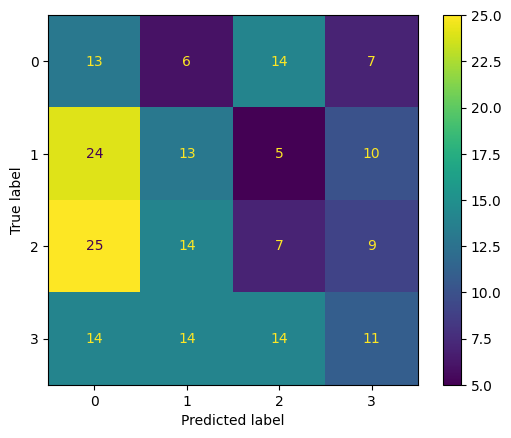

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier()

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

scramble = True

# this works for numpy arrays
rng = np.random.default_rng()
target_train_used = rng.choice(target_train, size=target_train.size, replace=False) if scramble else target_train.copy()

# if you are using a panda dataframe you should use something like
# target_train_used = target_train.sample(frac=1.0).reset_index(drop=True) if scramble else target_train.copy()

model.fit(features_train, target_train_used)

target_test_predicted = model.predict(features_test)

print("Accuracy:                 {:.4f}".format(metrics.accuracy_score(target_test,target_test_predicted)))
print("Precision (micro):        {:.4f}".format(metrics.precision_score(target_test,target_test_predicted,average='micro')))
print("Precision (macro):        {:.4f}".format(metrics.precision_score(target_test,target_test_predicted,average='macro')))
print("Recall (micro):           {:.4f}".format(metrics.recall_score(target_test,target_test_predicted,average='micro')))
print("Recall (macro):           {:.4f}".format(metrics.recall_score(target_test,target_test_predicted,average='macro')))

cfm = metrics.ConfusionMatrixDisplay.from_predictions(target_test,target_test_predicted)

## Hyperparameter search by hand



In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

n_classes=4
n_samples=100

uneven_classes = False

if uneven_classes:
  weights=[4, 1, 0.4, 0.1]
  weights/=np.sum(weights)
else:
  weights=None

features, target = make_classification(
    n_samples=n_samples,
    n_features=12,
    n_informative=4,
    n_redundant=1,
    n_repeated=0,
    n_classes=n_classes,
    shuffle=True,
    weights=weights
)

feature_names = [f"feature {i}" for i in range(features.shape[1])]

print("Size of each class")
for i in range(n_classes):
  num = np.sum(target == i)
  perc = num/n_samples
  print("- {:d}: {:d} ({:.1f}%)".format(i,num,perc*100))

Size of each class
- 0: 26 (26.0%)
- 1: 25 (25.0%)
- 2: 24 (24.0%)
- 3: 25 (25.0%)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit

scoring = {'accuracy':'accuracy',
            'recall_micro': metrics.make_scorer(metrics.recall_score, zero_division=np.nan, average='micro'),
            'precision_micro': metrics.make_scorer(metrics.precision_score, zero_division=np.nan,average='micro'),
            'recall_macro': metrics.make_scorer(metrics.recall_score, zero_division=np.nan, average='macro'),
            'precision_macro': metrics.make_scorer(metrics.precision_score, zero_division=np.nan,average='macro'),
            'roc_auc_ovr': 'roc_auc_ovr',
            'roc_auc_ovo': 'roc_auc_ovo'
}

max_depths = [2, 3, 4, 5, 6]

NumSplits=100
cv_random = ShuffleSplit(n_splits=NumSplits, test_size=0.2)

for d in max_depths:
    model = RandomForestClassifier(n_estimators=100, max_depth=d)

    # Evaluate the models using crossvalidation
    scores_random = cross_validate(
        model,
        features, target,
        scoring=scoring,
        cv=cv_random,
        return_train_score=True,
        return_estimator=True,
        return_indices=True
    )

    print("max_depth={:d}".format(d))
    print("- Accuracy:               {:.3f} +- {:.3f}".format(scores_random['test_accuracy'].mean(), scores_random['test_accuracy'].std()))
    print("- ROC AUC (OVR, Macro):   {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_roc_auc_ovr']), np.nanstd(scores_random['test_roc_auc_ovr'])))
    print("- ROC AUC (OVO, Macro):   {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_roc_auc_ovo']), np.nanstd(scores_random['test_roc_auc_ovo'])))
    print("- Precision (Micro):      {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_precision_micro']), np.nanstd(scores_random['test_precision_micro'])))
    print("- Precision (Macro):      {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_precision_macro']), np.nanstd(scores_random['test_precision_macro'])))
    print("- Recall (Micro):         {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_precision_micro']), np.nanstd(scores_random['test_precision_micro'])))
    print("- Recall (Macro):         {:.3f} +- {:.3f}".format(np.nanmean(scores_random['test_precision_macro']), np.nanstd(scores_random['test_precision_macro'])))
    print(" ")



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py", line 635, in roc_auc_score
    return _multiclass_roc_auc_score(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/

max_depth=2
- Accuracy:               0.588 +- 0.101
- ROC AUC (OVR, Macro):   0.853 +- 0.044
- ROC AUC (OVO, Macro):   0.856 +- 0.043
- Precision (Micro):      0.588 +- 0.101
- Precision (Macro):      0.620 +- 0.109
- Recall (Micro):         0.588 +- 0.101
- Recall (Macro):         0.620 +- 0.109
 


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py", line 635, in roc_auc_score
    return _multiclass_roc_auc_score(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/

max_depth=3
- Accuracy:               0.610 +- 0.086
- ROC AUC (OVR, Macro):   0.863 +- 0.047
- ROC AUC (OVO, Macro):   0.865 +- 0.049
- Precision (Micro):      0.610 +- 0.086
- Precision (Macro):      0.645 +- 0.095
- Recall (Micro):         0.610 +- 0.086
- Recall (Macro):         0.645 +- 0.095
 


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py", line 635, in roc_auc_score
    return _multiclass_roc_auc_score(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/

max_depth=4
- Accuracy:               0.637 +- 0.108
- ROC AUC (OVR, Macro):   0.874 +- 0.049
- ROC AUC (OVO, Macro):   0.876 +- 0.047
- Precision (Micro):      0.637 +- 0.108
- Precision (Macro):      0.655 +- 0.117
- Recall (Micro):         0.637 +- 0.108
- Recall (Macro):         0.655 +- 0.117
 


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py", line 635, in roc_auc_score
    return _multiclass_roc_auc_score(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/

max_depth=5
- Accuracy:               0.663 +- 0.102
- ROC AUC (OVR, Macro):   0.878 +- 0.049
- ROC AUC (OVO, Macro):   0.877 +- 0.049
- Precision (Micro):      0.663 +- 0.102
- Precision (Macro):      0.674 +- 0.102
- Recall (Micro):         0.663 +- 0.102
- Recall (Macro):         0.674 +- 0.102
 
max_depth=6
- Accuracy:               0.674 +- 0.100
- ROC AUC (OVR, Macro):   0.879 +- 0.049
- ROC AUC (OVO, Macro):   0.880 +- 0.049
- Precision (Micro):      0.674 +- 0.100
- Precision (Macro):      0.694 +- 0.096
- Recall (Micro):         0.674 +- 0.100
- Recall (Macro):         0.694 +- 0.096
 


## Hyperparameter search using GridSearchCV

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV

scoring = {'accuracy':'accuracy',
            'recall_micro': metrics.make_scorer(metrics.recall_score, zero_division=np.nan, average='micro'),
            'precision_micro': metrics.make_scorer(metrics.precision_score, zero_division=np.nan,average='micro'),
            'recall_macro': metrics.make_scorer(metrics.recall_score, zero_division=np.nan, average='macro'),
            'precision_macro': metrics.make_scorer(metrics.precision_score, zero_division=np.nan,average='macro'),
            'roc_auc_ovr': 'roc_auc_ovr',
            'roc_auc_ovo': 'roc_auc_ovo'
}

NumSplits=100
cv_random = ShuffleSplit(n_splits=NumSplits, test_size=0.2)


parameters = {'max_depth': [5,6,7,8]
              }

model = RandomForestClassifier(100)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    cv=cv_random,
    scoring='accuracy',
)
grid_search.fit(features,target)

print("Best Params:", grid_search.best_params_) #
print("Best Score:", grid_search.best_score_) #


Best Params: {'max_depth': 6}
Best Score: 0.67


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV

scoring = {'accuracy':'accuracy',
            'recall_micro': metrics.make_scorer(metrics.recall_score, zero_division=np.nan, average='micro'),
            'precision_micro': metrics.make_scorer(metrics.precision_score, zero_division=np.nan,average='micro'),
            'recall_macro': metrics.make_scorer(metrics.recall_score, zero_division=np.nan, average='macro'),
            'precision_macro': metrics.make_scorer(metrics.precision_score, zero_division=np.nan,average='macro'),
            'roc_auc_ovr': 'roc_auc_ovr',
            'roc_auc_ovo': 'roc_auc_ovo'
}

NumSplits=100
cv_random = ShuffleSplit(n_splits=NumSplits, test_size=0.2)


parameters = {'max_depth': [6,7,8],
              'max_features': [0.3, 0.5, 0.8]
              }

model = RandomForestClassifier(100)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    cv=cv_random,
    scoring='accuracy',
)
grid_search.fit(features,target)

print("Best Params:", grid_search.best_params_) #
print("Best Score:", grid_search.best_score_) #


Best Params: {'max_depth': 6, 'max_features': 0.5}
Best Score: 0.704


In [ ]:
grid_search.cv_results_

### Feature Importance

In [67]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

n_classes=4
n_samples=1000

uneven_classes = False

if uneven_classes:
  weights=[4, 1, 0.4, 0.1]
  weights/=np.sum(weights)
else:
  weights=None

features, target = make_classification(
    n_samples=n_samples,
    n_features=12,
    n_informative=4,
    n_redundant=1,
    n_repeated=0,
    n_classes=n_classes,
    shuffle=True,
    weights=weights
)

feature_names = [f"feature {i}" for i in range(features.shape[1])]

print("Size of each class")
for i in range(n_classes):
  num = np.sum(target == i)
  perc = num/n_samples
  print("- {:d}: {:d} ({:.1f}%)".format(i,num,perc*100))

Size of each class
- 0: 249 (24.9%)
- 1: 250 (25.0%)
- 2: 251 (25.1%)
- 3: 250 (25.0%)


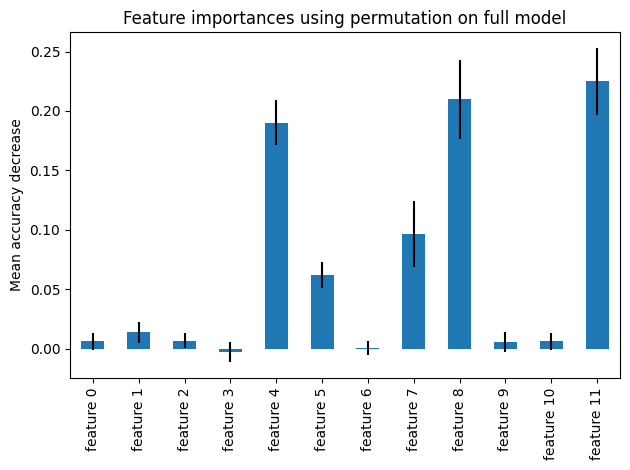

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance

model = RandomForestClassifier()

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

scramble = False

# this works for numpy arrays
rng = np.random.default_rng()
target_train_used = rng.choice(target_train, size=target_train.size, replace=False) if scramble else target_train.copy()

# if you are using a panda dataframe you should use something like
# target_train_used = target_train.sample(frac=1.0).reset_index(drop=True) if scramble else target_train.copy()

model.fit(features_train, target_train_used)

result = permutation_importance(
    model, features_test, target_test, n_repeats=10, random_state=42, n_jobs=2
)

feature_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
